<a href="https://colab.research.google.com/github/Francode007/PYTORCH_CODES/blob/main/Classification_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Fashion-MNIST

Now it's our turn to build and train a neural network. We'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets we'll use in the real world.

<img src='https://github.com/Francode007/deep-learning-v2-pytorch/blob/master/intro-to-pytorch/assets/fashion-mnist-sprite.png?raw=1' width=500px>

First off, let's load the dataset through torchvision.

In [ ]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2020-10-17 18:28:19--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

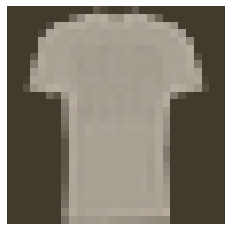

In [ ]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [ ]:
from torch import nn
import torch.nn.functional as F

In [ ]:
# TODO: Define your network architecture here
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(784,256)
    self.fc2=nn.Linear(256,128)
    self.fc3=nn.Linear(128,64)
    self.fc4=nn.Linear(64,10)
  def forward(self, x):
    x=x.view(x.shape[0],-1)#flattening tensor for the layers
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=F.relu(self.fc3(x))
    x=F.log_softmax(self.fc4(x),dim=1)
    return x


# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [ ]:
from torch import optim

In [ ]:
# TODO: Create the network, define the criterion and optimizer
model=Model()
criterion=nn.NLLLoss()
optimizer=optim.Adam(model.parameters(), lr=0.003)

With the probabilities, we can get the most likely class using the `ps.topk` method. This returns the $k$ highest values. Since we just want the most likely class, we can use `ps.topk(1)`. This returns a tuple of the top-$k$ values and the top-$k$ indices. If the highest value is the fifth element, we'll get back 4 as the index.

In [ ]:
train_losses, test_losses = [], []
# TODO: Train the network here
epochs=30
for e in range(epochs):
  running_loss=0
  #training model on trainloader
  for images,labels in trainloader:
    #zeroing the grads
    optimizer.zero_grad()
    #get prediction values from our model
    pred=model(images)
    loss=criterion(pred, labels)
    #run backprop
    loss.backward()
    #update gradients
    optimizer.step()
    running_loss+=loss.item()
  else:
      test_loss=0
      accuracy=0
      # Turn off gradients for validation, saves memory and computations
      with torch.no_grad():
      #loop over test dataset for validation  
        for images,labels in testloader:
          #prediction of model image
          pred = model(images)
          #test loss calculation
          test_loss += criterion(pred, labels)
          #exponential to compensate log value due to model's log_softmax output fn
          exp_pred=torch.exp(pred)
          #selecting the best classes(best probablility) for each image
          top_p, top_class = pred.topk(1, dim=1)
          #comparing values of labels and top_classes to output a boolean tensor
          equals= top_class == labels.view(*top_class.shape)
          #generating accuracy
          accuracy += torch.mean(equals.type(torch.FloatTensor))
      
      #appending the losses and accuracy
      train_losses.append(running_loss/len(trainloader))
      test_losses.append(test_loss/len(testloader))
      print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))


Epoch: 1/30..  Training Loss: 0.473..  Test Loss: 0.462..  Test Accuracy: 0.829
Epoch: 2/30..  Training Loss: 0.388..  Test Loss: 0.395..  Test Accuracy: 0.860
Epoch: 3/30..  Training Loss: 0.352..  Test Loss: 0.379..  Test Accuracy: 0.860
Epoch: 4/30..  Training Loss: 0.331..  Test Loss: 0.362..  Test Accuracy: 0.869
Epoch: 5/30..  Training Loss: 0.316..  Test Loss: 0.406..  Test Accuracy: 0.854
Epoch: 6/30..  Training Loss: 0.303..  Test Loss: 0.362..  Test Accuracy: 0.871
Epoch: 7/30..  Training Loss: 0.292..  Test Loss: 0.378..  Test Accuracy: 0.868
Epoch: 8/30..  Training Loss: 0.277..  Test Loss: 0.346..  Test Accuracy: 0.874
Epoch: 9/30..  Training Loss: 0.272..  Test Loss: 0.369..  Test Accuracy: 0.878
Epoch: 10/30..  Training Loss: 0.266..  Test Loss: 0.381..  Test Accuracy: 0.875
Epoch: 11/30..  Training Loss: 0.259..  Test Loss: 0.369..  Test Accuracy: 0.874
Epoch: 12/30..  Training Loss: 0.250..  Test Loss: 0.356..  Test Accuracy: 0.880
Epoch: 13/30..  Training Loss: 0.246.

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

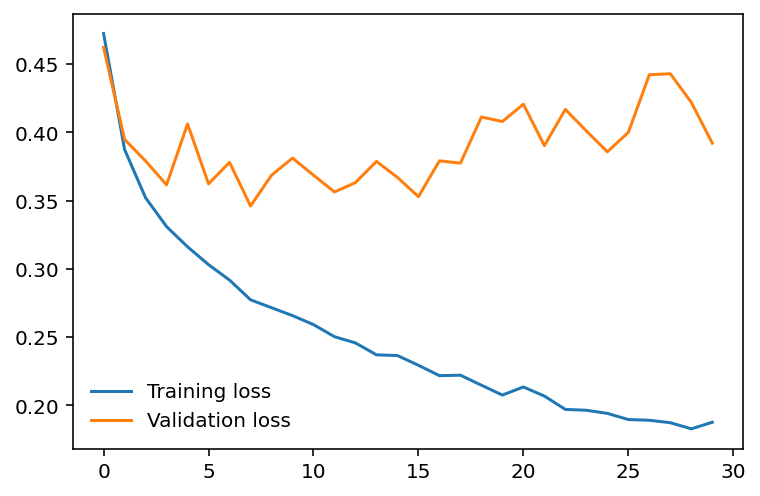

In [ ]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

## Overfitting

If we look at the training and validation losses as we train the network, we can see a phenomenon known as overfitting.

<img src='https://github.com/Francode007/deep-learning-v2-pytorch/blob/master/intro-to-pytorch/assets/overfitting.png?raw=1' width=450px>

The network learns the training set better and better, resulting in lower training losses. However, it starts having problems generalizing to data outside the training set leading to the validation loss increasing. The ultimate goal of any deep learning model is to make predictions on new data, so we should strive to get the lowest validation loss possible. One option is to use the version of the model with the lowest validation loss, here the one around 8-10 training epochs. This strategy is called *early-stopping*. In practice, you'd save the model frequently as you're training then later choose the model with the lowest validation loss.

The most common method to reduce overfitting (outside of early-stopping) is *dropout*, where we randomly drop input units. This forces the network to share information between weights, increasing it's ability to generalize to new data. Adding dropout in PyTorch is straightforward using the [`nn.Dropout`](https://pytorch.org/docs/stable/nn.html#torch.nn.Dropout) module.

```python
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        
        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x
```

During training we want to use dropout to prevent overfitting, but during inference we want to use the entire network. So, we need to turn off dropout during validation, testing, and whenever we're using the network to make predictions. To do this, you use `model.eval()`. This sets the model to evaluation mode where the dropout probability is 0. You can turn dropout back on by setting the model to train mode with `model.train()`. In general, the pattern for the validation loop will look like this, where you turn off gradients, set the model to evaluation mode, calculate the validation loss and metric, then set the model back to train mode.

```python
# turn off gradients
with torch.no_grad():
    
    # set model to evaluation mode
    model.eval()
    
    # validation pass here
    for images, labels in testloader:
        ...

# set model back to train mode
model.train()
```

In [ ]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [ ]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.605..  Test Loss: 0.447..  Test Accuracy: 0.840
Epoch: 2/30..  Training Loss: 0.480..  Test Loss: 0.427..  Test Accuracy: 0.847
Epoch: 3/30..  Training Loss: 0.444..  Test Loss: 0.417..  Test Accuracy: 0.852
Epoch: 4/30..  Training Loss: 0.433..  Test Loss: 0.405..  Test Accuracy: 0.855
Epoch: 5/30..  Training Loss: 0.420..  Test Loss: 0.405..  Test Accuracy: 0.857
Epoch: 6/30..  Training Loss: 0.407..  Test Loss: 0.400..  Test Accuracy: 0.854
Epoch: 7/30..  Training Loss: 0.401..  Test Loss: 0.384..  Test Accuracy: 0.866
Epoch: 8/30..  Training Loss: 0.403..  Test Loss: 0.403..  Test Accuracy: 0.867
Epoch: 9/30..  Training Loss: 0.395..  Test Loss: 0.388..  Test Accuracy: 0.868
Epoch: 10/30..  Training Loss: 0.390..  Test Loss: 0.402..  Test Accuracy: 0.859
Epoch: 11/30..  Training Loss: 0.383..  Test Loss: 0.389..  Test Accuracy: 0.860
Epoch: 12/30..  Training Loss: 0.379..  Test Loss: 0.371..  Test Accuracy: 0.869
Epoch: 13/30..  Training Loss: 0.389.

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

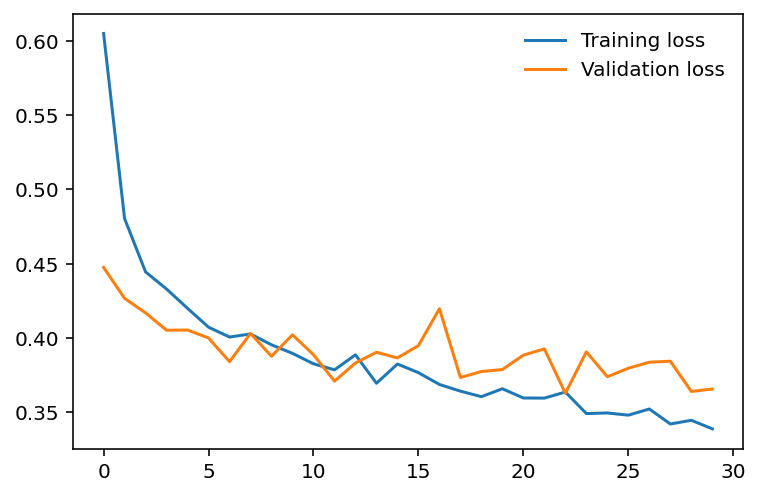

In [ ]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

## Inference

Now that the model is trained, we can use it for inference. We've done this before, but now we need to remember to set the model in inference mode with `model.eval()`. You'll also want to turn off autograd with the `torch.no_grad()` context.

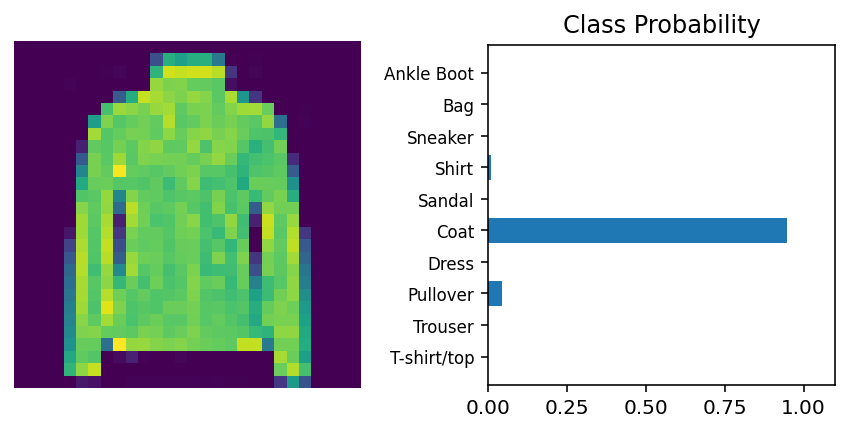

In [ ]:
# Import helper module (should be in the repo)
import helper

# Test out your network!

model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Plot the image and probabilities
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')